In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("month.csv", header=None, names=["time","counts","span"])

UNIX時間を標準時に変更

In [4]:
import datetime

In [5]:
df['time'] = pd.to_datetime(df['time'].astype(int), unit='s')

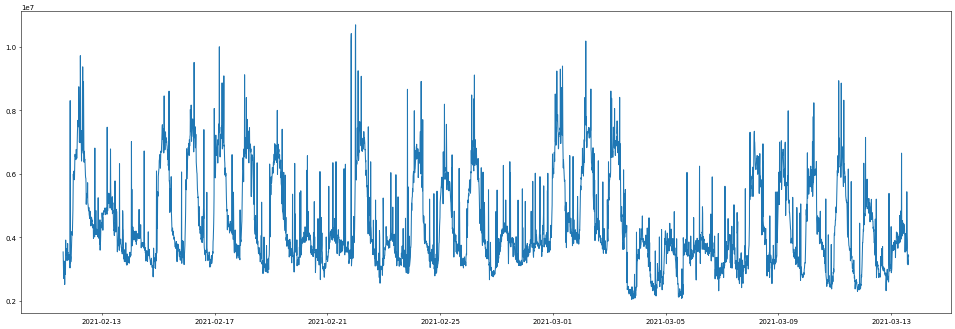

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil

plt.figure(figsize=(24, 8), dpi=50)
plt.plot(df['time'], df['counts'])


In [7]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [8]:
Q = df['counts']

<ipython-input-9-f819d1d0ba8f>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(Q, freq=7)


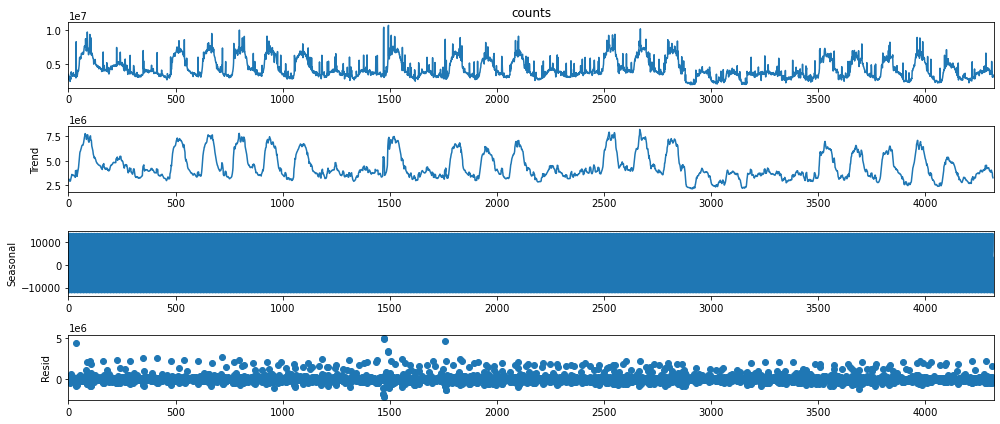

<Figure size 1200x400 with 0 Axes>

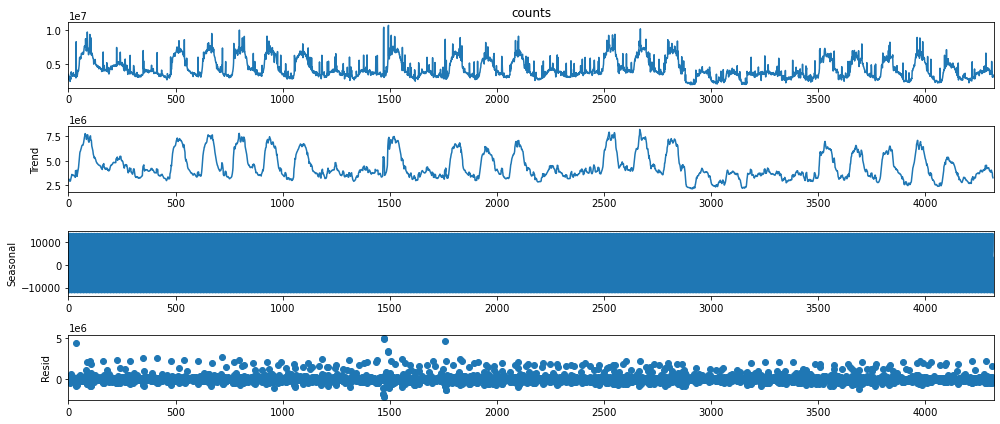

In [9]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(Q, freq=7)

plt.rcParams["figure.figsize"] = (14, 6)
plt.figure(figsize=(24, 8), dpi=50)
res.plot()



In [10]:
print(res)

季節変動だけ取り除く

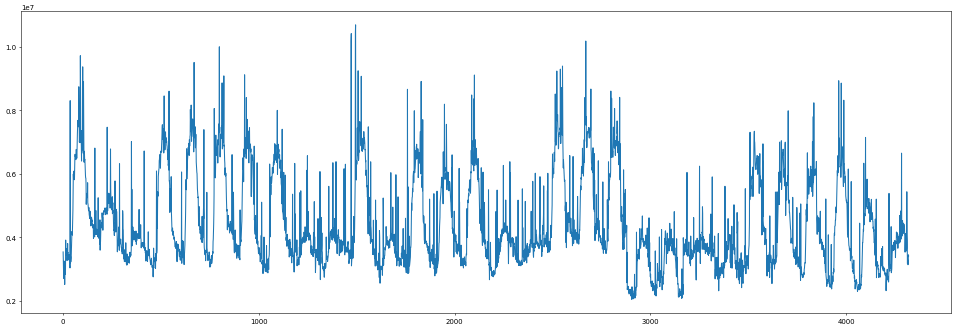

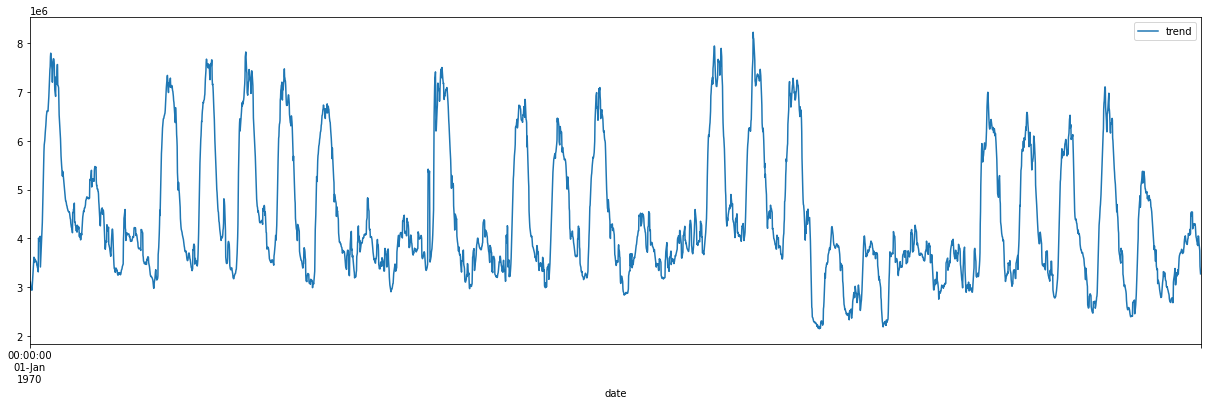

In [11]:
trend = res.trend
trend = pd.DataFrame({'trend': trend, 'date':Q.index})

#print(trend['trend'].tolist())
tmp = trend['trend'].dropna()
tmp2 = tmp.tolist()
#print(tmp2)
#tmp3 = tmp2.dropna()
#print(tmp3)

trend_tmp = trend['date'].to_list()
trend['date'] = pd.to_datetime(trend['date'], format='%Y-%m-%d')
trend = trend.set_index(['date'])

plt.rcParams["figure.figsize"] = (21, 6)

plt.figure(figsize=(24, 8), dpi=50)

plt.plot(Q)
trend = trend.plot()



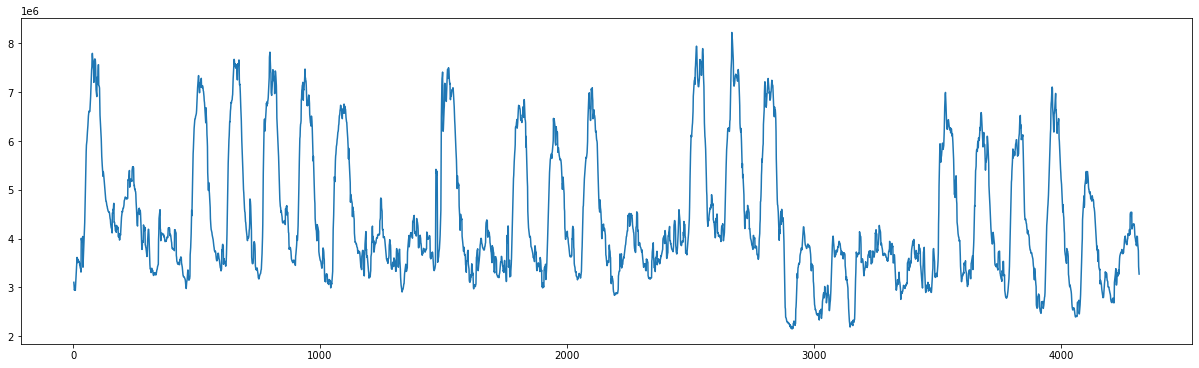

In [15]:
plt.plot(tmp)

In [16]:
import numpy as np

P = tmp
Q = np.array(P).reshape(-1,1)

X1 = Q[0:-3, :]  # 予測対象日の3日前のデータ
X2 = Q[1:-2, :]  # 予測対象日の2日前のデータ
X3 = Q[2:-1, :]  # 予測対象日の前日データ
Y = Q[3:, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。
scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

In [19]:
print(len(tmp))

4314


In [21]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。
# train, testデータを定義
X_train = X[:3600, :, :]
X_test = X[3600:, :, :]
Y_train = Y[:3600, :]
Y_test = Y[3600:, :]

In [22]:
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics

model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=100, verbose=2)

Epoch 1/100
113/113 - 3s - loss: 0.0279 - mean_absolute_error: 0.1176
Epoch 2/100
113/113 - 0s - loss: 0.0019 - mean_absolute_error: 0.0326
Epoch 3/100
113/113 - 0s - loss: 0.0011 - mean_absolute_error: 0.0228
Epoch 4/100
113/113 - 0s - loss: 0.0010 - mean_absolute_error: 0.0224
Epoch 5/100
113/113 - 0s - loss: 0.0010 - mean_absolute_error: 0.0218
Epoch 6/100
113/113 - 0s - loss: 9.5783e-04 - mean_absolute_error: 0.0212
Epoch 7/100
113/113 - 0s - loss: 9.1221e-04 - mean_absolute_error: 0.0208
Epoch 8/100
113/113 - 0s - loss: 8.7161e-04 - mean_absolute_error: 0.0202
Epoch 9/100
113/113 - 0s - loss: 8.3039e-04 - mean_absolute_error: 0.0197
Epoch 10/100
113/113 - 0s - loss: 7.9144e-04 - mean_absolute_error: 0.0193
Epoch 11/100
113/113 - 0s - loss: 7.4944e-04 - mean_absolute_error: 0.0187
Epoch 12/100
113/113 - 0s - loss: 7.1381e-04 - mean_absolute_error: 0.0181
Epoch 13/100
113/113 - 0s - loss: 6.7094e-04 - mean_absolute_error: 0.0176
Epoch 14/100
113/113 - 0s - loss: 6.3327e-04 - mean_ab

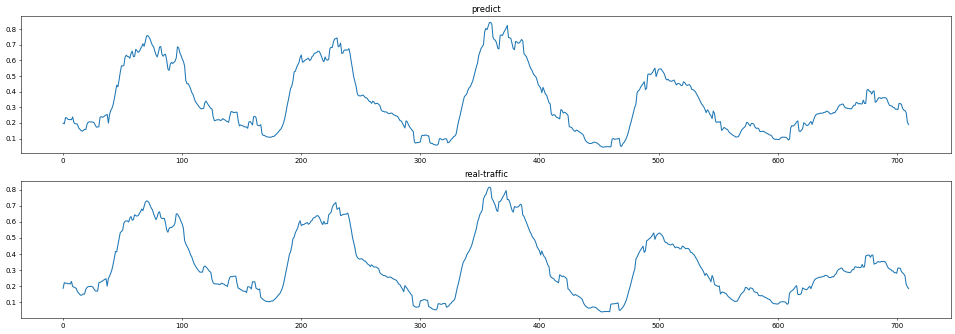

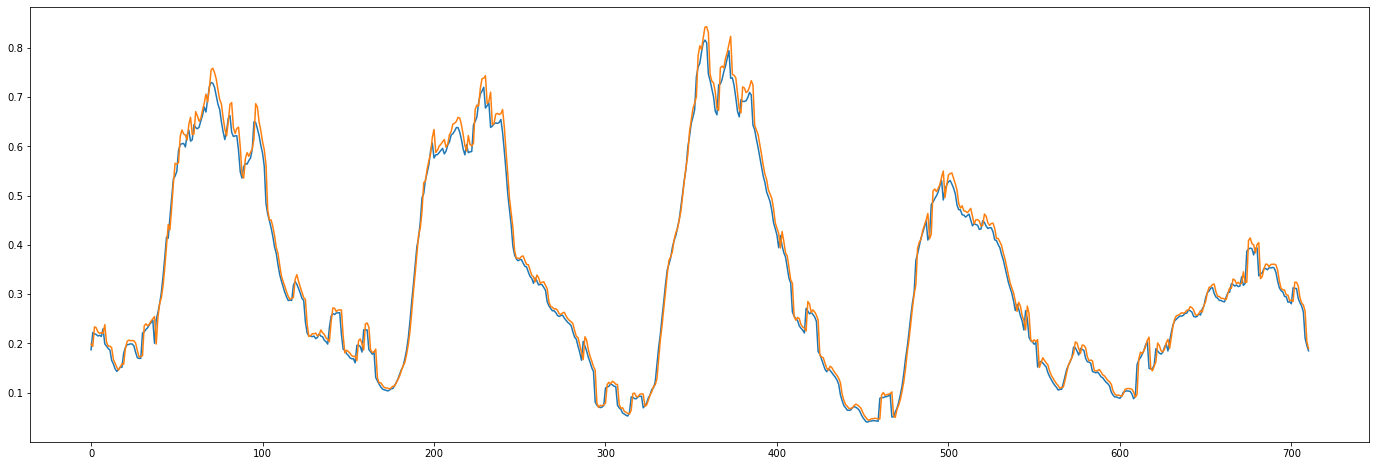

In [23]:
Predict = model.predict(X_test)

#plt.figure(figsize=(24, 8), dpi=50)
#plt.plot(Predict)
#plt.plot(Y_test)

plt.figure(figsize=(24, 8), dpi=50)
plt.subplot(211)
plt.title("predict")
plt.plot(Predict)
plt.subplot(212)
plt.title("real-traffic")
plt.plot(Y_test)


plt.figure(figsize=(24,8))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')

predicted=5168887.674900, expected=4505495.000000
predicted=4939331.138881, expected=4750342.000000
predicted=4821700.753108, expected=4971667.000000
predicted=4832800.722825, expected=4653821.000000
predicted=4709509.769475, expected=4712487.000000
predicted=4718261.040155, expected=4560730.000000
predicted=4655917.073695, expected=4136020.000000
predicted=4469224.048928, expected=4003345.000000
predicted=4306493.259670, expected=3738640.000000
predicted=4078689.065802, expected=3619126.000000
predicted=3910930.212182, expected=3830040.000000
predicted=3874654.825008, expected=3858414.000000
predicted=3839780.952303, expected=6127594.000000
predicted=4769273.655841, expected=3912546.000000
predicted=4261863.407763, expected=3633161.000000
predicted=4090865.218782, expected=5388108.000000
predicted=4668320.159354, expected=4398692.000000
predicted=4540323.683095, expected=4444462.000000
predicted=4572553.630599, expected=4009601.000000
predicted=4235826.224548, expected=4250564.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3488695.384513, expected=3348085.000000
predicted=3422263.778338, expected=3597520.000000
predicted=3508759.106018, expected=3577304.000000
predicted=3523426.344777, expected=3488209.000000
predicted=3511947.168466, expected=3315156.000000
predicted=3437568.413498, expected=3591049.000000
predicted=3507411.211245, expected=3661241.000000
predicted=3567937.290864, expected=4277410.000000
predicted=3849298.969602, expected=3839521.000000
predicted=3797609.820634, expected=3695700.000000
predicted=3770469.109460, expected=3661536.000000
predicted=3748029.234175, expected=3662413.000000
predicted=3741034.796902, expected=3758714.000000
predicted=3763730.758641, expected=3780599.000000
predicted=3743968.187765, expected=3963211.000000
predicted=3824461.199004, expected=3945873.000000
predicted=3861136.932185, expected=4264301.000000
predicted=4027159.545922, expected=4232143.000000
predicted=4096020.912835, expected=4161207.000000
predicted=4125438.442097, expected=4318725.000000


predicted=3901006.422345, expected=4012410.000000
predicted=3964818.991077, expected=3816923.000000
predicted=3899281.985806, expected=3888176.000000
predicted=3875387.711685, expected=4262439.000000
predicted=4036910.317986, expected=3700371.000000
predicted=3887451.074330, expected=3694984.000000
predicted=3832680.439709, expected=3708188.000000
predicted=3781395.021712, expected=3575553.000000
predicted=3714586.239166, expected=3696627.000000
predicted=3714369.026873, expected=3579513.000000
predicted=3631485.280843, expected=3693611.000000
predicted=3663477.088658, expected=3958604.000000
predicted=3775839.070598, expected=3966091.000000
predicted=3836057.376438, expected=3541911.000000
predicted=3710891.879186, expected=3499079.000000
predicted=3644470.211602, expected=3551192.000000
predicted=3627060.449054, expected=3591733.000000
predicted=3625022.045559, expected=3450922.000000
predicted=3539342.678622, expected=3483084.000000
predicted=3505420.180934, expected=4811671.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3452579.202757, expected=3304740.000000
predicted=3409313.304856, expected=3404229.000000
predicted=3415154.019945, expected=3396604.000000
predicted=3432763.654089, expected=3606956.000000
predicted=3526532.013800, expected=3432552.000000
predicted=3447496.439646, expected=3337687.000000
predicted=3404932.938858, expected=3410245.000000
predicted=3417292.594694, expected=3335323.000000
predicted=3387801.261378, expected=3480204.000000
predicted=3433605.353938, expected=3377439.000000
predicted=3392846.165912, expected=3477112.000000
predicted=3430329.977762, expected=3588008.000000
predicted=3490550.893413, expected=3561686.000000
predicted=3513639.714856, expected=4623399.000000
predicted=3973741.871830, expected=3565837.000000
predicted=3740070.677932, expected=3508376.000000
predicted=3696951.835421, expected=3503560.000000
predicted=3631381.911053, expected=3608581.000000
predicted=3661841.746211, expected=3669948.000000
predicted=3672137.936934, expected=3752805.000000


predicted=3008527.056804, expected=3206305.000000
predicted=3089212.801982, expected=3146479.000000
predicted=3109203.138510, expected=2735086.000000
predicted=2960254.590600, expected=3094917.000000
predicted=3040695.608881, expected=3166769.000000
predicted=3082549.507243, expected=3035346.000000
predicted=3061674.665502, expected=3213822.000000
predicted=3113420.068209, expected=3104961.000000
predicted=3093444.983901, expected=3237506.000000
predicted=3174199.174388, expected=5610925.000000
predicted=4166074.421033, expected=3234889.000000
predicted=3640185.186452, expected=3224169.000000
predicted=3581608.406514, expected=3230967.000000
predicted=3447012.293896, expected=3361537.000000
predicted=3508359.352966, expected=3223818.000000
predicted=3414973.559429, expected=3279458.000000
predicted=3268885.224237, expected=3873549.000000
predicted=3513438.474362, expected=3589817.000000
predicted=3513322.037944, expected=3318539.000000
predicted=3442873.622827, expected=3315838.000000


predicted=6821012.539248, expected=6280037.000000
predicted=6611897.299398, expected=6217306.000000
predicted=6456163.864707, expected=6162198.000000
predicted=6339618.607477, expected=6137550.000000
predicted=6249785.112301, expected=6158128.000000
predicted=6198246.013174, expected=6321511.000000
predicted=6238566.626207, expected=6394419.000000
predicted=6290979.355142, expected=6486616.000000
predicted=6363282.073389, expected=6490405.000000
predicted=6407977.972693, expected=6580338.000000
predicted=6482771.871839, expected=6579016.000000
predicted=6525556.800497, expected=6201737.000000
predicted=6396056.497675, expected=5989436.000000
predicted=6251780.536938, expected=6137370.000000
predicted=6225158.837843, expected=6045699.000000
predicted=6154951.473779, expected=6257841.000000
predicted=6194241.234223, expected=6400927.000000
predicted=6248019.042411, expected=6548768.000000
predicted=6359089.711064, expected=6356628.000000
predicted=6349058.172929, expected=6165663.000000


predicted=5598799.282545, expected=5676087.000000
predicted=5613983.330320, expected=5947904.000000
predicted=5744657.405554, expected=5835582.000000
predicted=5786712.868570, expected=5922494.000000
predicted=5846530.356521, expected=7987657.000000
predicted=6731501.288979, expected=5606706.000000
predicted=6160958.925835, expected=5095995.000000
predicted=5823148.441717, expected=5081325.000000
predicted=5551294.426692, expected=5110657.000000
predicted=5469711.265019, expected=5177707.000000
predicted=5377236.078846, expected=4781022.000000
predicted=5016475.174247, expected=4790759.000000
predicted=4922790.944463, expected=4675137.000000
predicted=4825377.295282, expected=4520407.000000
predicted=4713558.265892, expected=4457314.000000
predicted=4609879.301361, expected=4378767.000000
predicted=4506308.854401, expected=4258848.000000
predicted=4408486.632491, expected=4235253.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4336873.173615, expected=3817675.000000
predicted=4117369.994522, expected=3828510.000000
predicted=4017803.958853, expected=3954937.000000
predicted=3992340.622717, expected=3973475.000000
predicted=3978201.191054, expected=3871480.000000
predicted=3918814.940325, expected=3872394.000000
predicted=3887026.927326, expected=3923258.000000
predicted=3907310.563366, expected=3852608.000000
predicted=3888657.084991, expected=3804942.000000
predicted=3854975.447126, expected=5261994.000000
predicted=4440940.838572, expected=4302918.000000
predicted=4306108.654149, expected=3620719.000000
predicted=4050255.807041, expected=3513711.000000
predicted=3855765.564126, expected=3523124.000000
predicted=3784356.780007, expected=3398927.000000
predicted=3667492.683298, expected=3627558.000000
predicted=3604180.187576, expected=3395162.000000
predicted=3476585.149148, expected=3374372.000000
predicted=3440849.686788, expected=3344168.000000
predicted=3399438.851770, expected=3509010.000000


predicted=3695428.797768, expected=3749611.000000
predicted=3714898.313868, expected=3748154.000000
predicted=3732810.774884, expected=3640367.000000
predicted=3696406.725205, expected=3400900.000000
predicted=3572044.802956, expected=3655789.000000
predicted=3625145.967860, expected=3466969.000000
predicted=3551551.115882, expected=3573189.000000
predicted=3567197.577016, expected=3574721.000000
predicted=3555134.078820, expected=3217821.000000
predicted=3411313.486325, expected=3186022.000000
predicted=3342154.567145, expected=3221597.000000
predicted=3293808.817556, expected=3042813.000000
predicted=3195129.441238, expected=2943175.000000
predicted=3091906.943885, expected=2896738.000000
predicted=3003701.967999, expected=5211676.000000
predicted=3927660.852041, expected=2818838.000000
predicted=3337500.762766, expected=2753770.000000
predicted=3187798.974870, expected=2667228.000000
predicted=2984150.392469, expected=2629663.000000
predicted=2914566.808143, expected=2458977.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3698015.630616, expected=4066095.000000
predicted=3836053.699038, expected=4356089.000000
predicted=4053979.790237, expected=4359534.000000
predicted=4197914.969282, expected=4370870.000000
predicted=4297104.961773, expected=4542694.000000
predicted=4397990.040218, expected=4543659.000000
predicted=4452949.173948, expected=4688574.000000
predicted=4560093.440390, expected=4962460.000000
predicted=4718746.507746, expected=4959145.000000
predicted=4806210.805633, expected=4779950.000000
predicted=4797512.122089, expected=5084539.000000
predicted=4928340.303038, expected=5217944.000000
predicted=5046513.127767, expected=5699693.000000
predicted=5319436.501432, expected=5837909.000000
predicted=5500802.431145, expected=6108041.000000
predicted=5739242.841577, expected=5945664.000000
predicted=5819765.067849, expected=6570423.000000
predicted=6153750.244108, expected=6033739.000000
predicted=6091275.819868, expected=6331964.000000
predicted=6226145.690087, expected=6257315.000000


predicted=5231176.747582, expected=5296818.000000
predicted=5166819.507734, expected=5454355.000000
predicted=5282736.044662, expected=5834602.000000
predicted=5501233.370124, expected=5388420.000000
predicted=5439646.221486, expected=5247245.000000
predicted=5386781.729286, expected=5175689.000000
predicted=5315964.925039, expected=4908481.000000
predicted=5171542.072349, expected=4940333.000000
predicted=5096618.445885, expected=4966818.000000
predicted=5024542.406943, expected=4855836.000000
predicted=4948456.652296, expected=4994940.000000
predicted=4964444.848266, expected=5226147.000000
predicted=5057017.324970, expected=4758026.000000
predicted=4922888.726472, expected=4878174.000000
predicted=4924505.052086, expected=4769399.000000
predicted=4856288.015582, expected=5095906.000000
predicted=4974485.836815, expected=4982473.000000
predicted=4959145.641287, expected=4490630.000000
predicted=4754197.283721, expected=4720323.000000
predicted=4767207.571303, expected=4948818.000000


predicted=3931393.916084, expected=3985551.000000
predicted=3942122.531390, expected=3817737.000000
predicted=3901596.139458, expected=4085653.000000
predicted=3996674.148692, expected=4067199.000000
predicted=4013801.477540, expected=4036851.000000
predicted=4024193.576361, expected=4689896.000000
predicted=4292242.526872, expected=3943258.000000
predicted=4115501.913618, expected=3852347.000000
predicted=4049960.716363, expected=3906873.000000
predicted=3997399.606641, expected=3949023.000000
predicted=3997147.625340, expected=4118157.000000
predicted=4050166.388999, expected=4835315.000000
predicted=4332855.741541, expected=3949126.000000
predicted=4133094.318320, expected=4097543.000000
predicted=4159792.074809, expected=6653824.000000
predicted=5186297.925989, expected=4079063.000000
predicted=4627391.142487, expected=4039747.000000
predicted=4505815.188916, expected=4068679.000000
predicted=4301500.278034, expected=4296235.000000
predicted=4389703.789171, expected=4526744.000000


In [59]:
import numpy as np

err = []
counter = 0 
for i in predictions:
        err.append(int(test[counter]-i))
        counter = counter + 1        
                   
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
err2 = np.array(err)

Test MSE: 244499798245.454


<Figure size 1512x432 with 0 Axes>

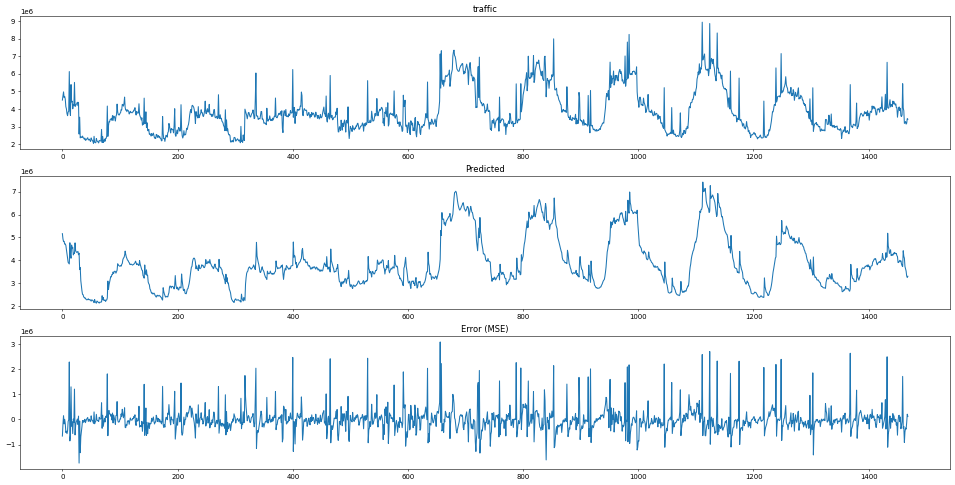

In [62]:
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.figure(figsize=(24, 12), dpi=50)

plt.subplot(3, 1, 1)
plt.title("traffic")
plt.plot(test)

plt.subplot(3, 1, 2)
plt.title("Predicted")
plt.plot(predictions)

plt.subplot(3, 1, 3)
plt.title("Error (MSE)")
plt.plot(err)

#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
plt.show()

In [120]:
print(len(Q))
print(len(tmp2))

4320
4314


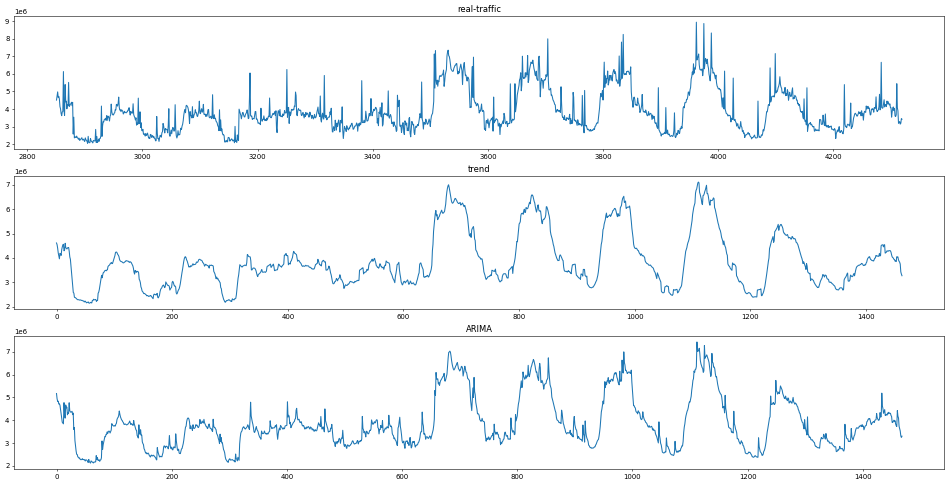

In [134]:
plt.figure(figsize=(24, 12), dpi=50)

plt.subplot(3, 1, 1)
plt.title("real-traffic")
plt.plot(Q[2851:4320])

plt.subplot(3, 1, 2)
plt.title("trend")
plt.plot(tmp2[2851:4320])

plt.subplot(3, 1, 3)
plt.title("ARIMA")
plt.plot(predictions)
